In [1]:
#importing the required libraries and packages
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import cv2 
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten , Dense , Conv2D , MaxPool2D , Dropout ,Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import load_model

In [2]:
#loading train and test data from the pre downloaded CIFAR data set
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

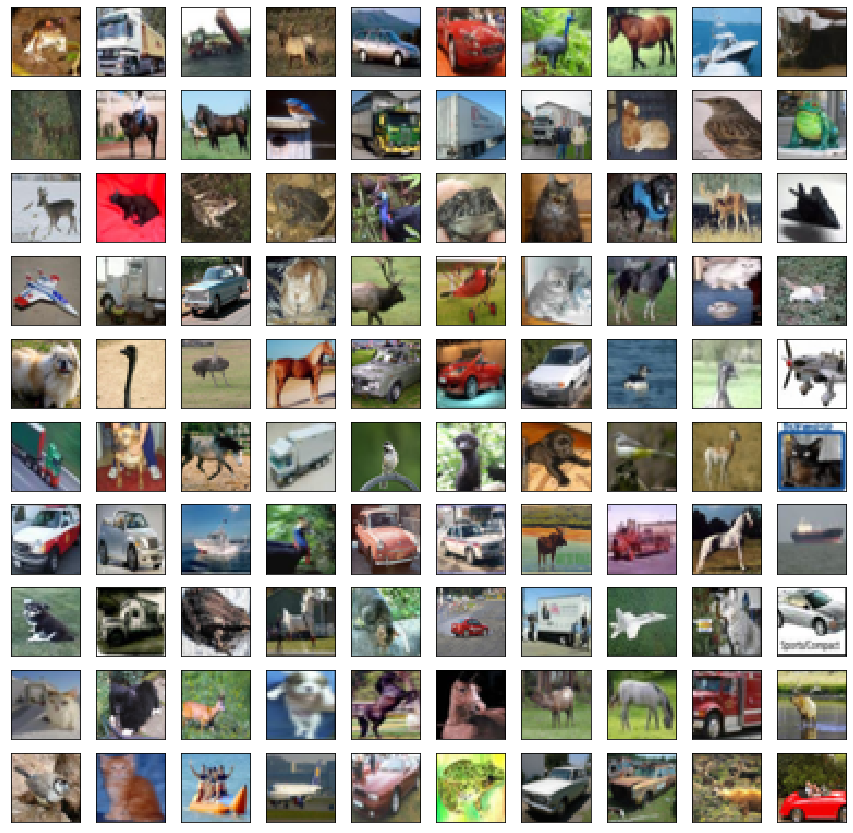

In [3]:
#showing the first 100 image of cifar10 data set
plt.figure(figsize=(15,15))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

In [4]:
#converting pixles values from int to float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#aplly Min-Max normaliztion on the train and test data
x_train /= 255
x_test /= 255

In [5]:
#applying image augmentation on the train data
aug_data = ImageDataGenerator(
# randomly shift images horizontaly (fraction of total height)
        width_shift_range=0.1,
# randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
# randomly flip images
        horizontal_flip=True,  
)
val_data= ImageDataGenerator()

In [6]:
#deviding training data
train_data= aug_data.flow(x_train[:40000],y_train[:40000],batch_size=32)
valid_data= val_data.flow(x_train[40000:],y_train[40000:],batch_size=32)

In [7]:
#calling sequential so we can build our network sequentally
model = Sequential()
#adding the first convolutinal layer (32 filters filter size = (3*3))
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape = [32, 32, 3]))
#adding the first max pooling layer with 2x2 pooling window and 2 pixles stride
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))
#adding the second convolutinal layer (64 filters filter size = (3*3))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
#adding the second max pooling layer with 2x2 pooling window and 2 pixles stride
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))
#adding the third convolutinal layer (128 filters filter size = (3*3))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
#adding the third max pooling layer with 2x2 pooling window and 2 pixles stride
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))
#adding the fourth convolutinal layer (256 filters filter size = (3*3))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
#adding the fourth max pooling layer with 2x2 pooling window and 2 pixles stride
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))
#adding dropout layer to minimize overfitting
model.add(Dropout(0.5))
#flatten layer to flatten the output to a vector of 256 element
model.add(Flatten())
#first fully connected layer (256 neuron each one connect with one value of the previous vector)
model.add(Dense(units = 256, activation='relu'))
#output layer with 10 neuron represent classes
model.add(Dense(units=10,activation='softmax'))

In [8]:
#showing our model structure
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 256)         2

In [9]:
#defining the optmizer and hyper parameters
opt = tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

In [10]:
#compiling the model
model.compile(optimizer=opt, loss = 'sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [11]:
#training the model
stat=model.fit(train_data,validation_data=valid_data,
          validation_steps=len(x_train[40000:])/32,
          steps_per_epoch=len(x_train[:40000])/32,
          epochs=100)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1250.0 steps, validate for 312.5 steps
Epoch 1/100
1250/1250 [==============================] - 16s 13ms/step - loss: 1.9084 - sparse_categorical_accuracy: 0.2972 - val_loss: 1.7900 - val_sparse_categorical_accuracy: 0.3533
Epoch 2/100
1250/1250 [==============================] - 14s 12ms/step - loss: 1.6040 - sparse_categorical_accuracy: 0.4112 - val_loss: 1.4567 - val_sparse_categorical_accuracy: 0.4704
Epoch 3/100
1250/1250 [==============================] - 14s 12ms/step - loss: 1.4865 - sparse_categorical_accuracy: 0.4584 - val_loss: 1.3902 - val_sparse_categorical_accuracy: 0.4968
Epoch 4/100
1250/1250 [==============================] - 15s 12ms/step - loss: 1.3957 - sparse_categorical_accuracy: 0.4938 - val_loss: 1.2947 - val_sparse_categorical_accuracy: 0.5451
Epoch 5/100
1250/1250 [==============================] - 14s 12ms/step - loss: 1.3161 - sparse_categorical_accuracy: 0.5285 - val_loss: 1.2285 - val_sparse_categ

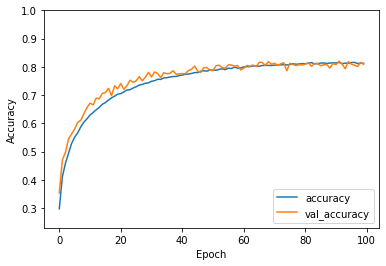

In [12]:
#plotting accuracy and validation accuracy during epoches
plt.plot(stat.history['sparse_categorical_accuracy'], label='accuracy')
plt.plot(stat.history['val_sparse_categorical_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.23, 1])
plt.legend(loc='lower right')

In [13]:
#saving the trained model to an .h5 file
model.save('Cifar10_classifier.h5')

In [14]:
## The End of building and training the deep neural network
#below is the test section

In [15]:
#loading the model for testing
cif10=load_model('Cifar10_Classifier.h5')

In [16]:
#testing the trained model with the testing data set
test_loss , test_accu = cif10.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 109us/sample - loss: 0.6069 - sparse_categorical_accuracy: 0.7999


(<Figure size 648x648 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2d146d26808>)

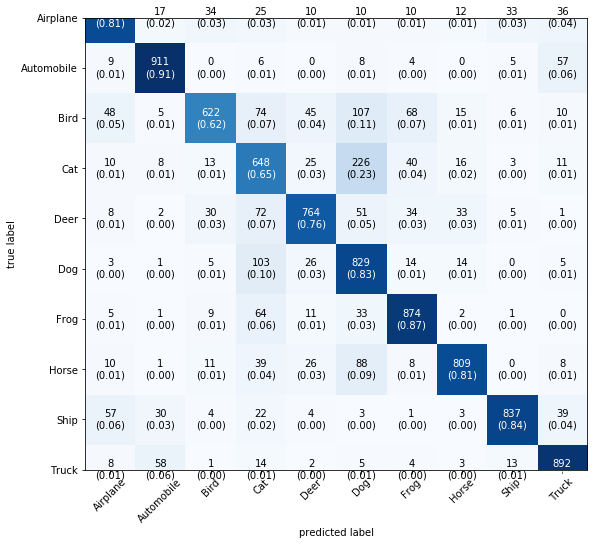

In [17]:
#calculating and plotting the confusion matrix
classes = ['Airplane','Automobile','Bird','Cat', 'Deer','Dog','Frog','Horse','Ship','Truck']
y_predict = cif10.predict_classes(x_test)
confusion = confusion_matrix(y_test,y_predict)
plot_confusion_matrix(confusion ,figsize=(9,9),class_names=classes,show_normed=True)